In [1]:
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import joblib
import re

# 파일 경로 설정
nodes_path = "D:/바탕 화면/2024_1학기 과제물/SNS수업/팀플/nodes.csv"
links_path_pattern = "D:/바탕 화면/DSRC/Links/Links_04*.csv"
entry_exit_path_pattern = [
    'D:/바탕 화면/DSRC/진출진입/entering_0401.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0402.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0403.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0404.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0405.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0406.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0407.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0408.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0409.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0410.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0411.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0412.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0413.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0414.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0415.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0416.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0417.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0418.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0419.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0420.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0421.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0422.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0423.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0424.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0425.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0426.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0427.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0428.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0429.csv',
    'D:/바탕 화면/DSRC/진출진입/entering_0430.csv'
]

# 데이터 로드
links_dfs = []
for f in tqdm(glob.glob(links_path_pattern), desc='Loading Links Data'):
    date = re.search(r'Links_04(\d+).csv', f).group(1)
    temp_df = pd.read_csv(f, encoding='utf-8', dtype={'Source': 'int32', 'Target': 'int32', 'Weight': 'float32'})
    temp_df['Date'] = '2024-04-' + date  # 'Date' 열 추가, 예: '2024-04-23'
    links_dfs.append(temp_df)
links_df = pd.concat(links_dfs, ignore_index=True)

# Entry/Exit 데이터 로드
entry_exit_dfs = []
for pattern in entry_exit_path_pattern:
    for f in tqdm(glob.glob(pattern), desc='Loading Entry/Exit Data'):
        temp_df = pd.read_csv(f, encoding='utf-8', dtype={'RSE_ID': 'int32', 'Count': 'int32'})
        date = re.search(r'entering_04(\d{2}).csv', f).group(1)
        print("date 출략")
        print(date)
        temp_df['Date'] = '2024-04-' + date  # 'Date' 열 추가
        entry_exit_dfs.append(temp_df)
        
entry_exit_df = pd.concat(entry_exit_dfs, ignore_index=True)

print("Entry/Exit 데이터 일부를 확인합니다:")
print(entry_exit_df.head())  # 여기에 추가되었습니다.

# 데이터 분할: 4월 데이터로 학습, 4월 23~30 데이터로 검증
# 'Date' 필터링
links_df['Date'] = pd.to_datetime(links_df['Date'])  # 'Date' 열을 datetime 타입으로 변환
entry_exit_df['Date'] = pd.to_datetime(entry_exit_df['Date'])

# 학습 및 검증 데이터 분리
train_links_df = links_df[links_df['Date'] < '2024-04-23'].copy()
validate_links_df = links_df[links_df['Date'] >= '2024-04-23'].copy()

# train_entry_exit_df의 일부 데이터 출력
print("train_links_df의 일부 데이터를 출력합니다:")
print(train_links_df.head())  # 이 부분에 코드를 삽입합니다.
print("날짜확인1")
print(entry_exit_df[entry_exit_df['Date'] < '2024-04-23'])

print("날짜확인2")
print(entry_exit_df[entry_exit_df['Date'] >= '2024-04-23'])

train_entry_exit_df = entry_exit_df[entry_exit_df['Date'] < '2024-04-23'].copy()
validate_entry_exit_df = entry_exit_df[entry_exit_df['Date'] >= '2024-04-23'].copy()

# train_entry_exit_df의 일부 데이터 출력
print("train_entry_exit_df의 일부 데이터를 출력합니다:")
print(train_entry_exit_df.head())  # 이 부분에 코드를 삽입합니다.

print("validate_entry_exit_df의일부 데이터를 출력합니다:")
print(validate_entry_exit_df.head())  # 이 부분에 코드를 삽입합니다.
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

# 학습 데이터에 레이블 인코더 적용
print("Applying Label Encoder to train_links_df...")
train_links_df['encoded_source'] = list(tqdm(label_encoder.fit_transform(train_links_df['Source']), desc='Encoding Train Links Data'))

# 검증 데이터에 동일한 레이블 인코더 적용 (transform을 사용)
print("Applying Label Encoder to validate_links_df...")
validate_links_df['encoded_source'] = list(tqdm(label_encoder.transform(validate_links_df['Source']), desc='Encoding Validate Links Data'))

# 데이터 샘플링
print("Sampling train_links_df...")
train_links_df = train_links_df.sample(frac=0.7, random_state=42)
print("Sampling validate_links_df...")
validate_links_df = validate_links_df.sample(frac=0.7, random_state=42)

# Entry/Exit 데이터에 대해서도 동일한 처리
print("Sampling train_entry_exit_df...")
train_entry_exit_df = train_entry_exit_df.sample(frac=0.7, random_state=42)
print("Sampling validate_entry_exit_df...")
validate_entry_exit_df = validate_entry_exit_df.sample(frac=0.7, random_state=42)

# 칼럼 이름 변경
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_', regex=False).str.replace('(', '', regex=False).str.replace(')', '', regex=False)
    return df

train_links_df = clean_column_names(train_links_df)
validate_links_df = clean_column_names(validate_links_df)
train_entry_exit_df = clean_column_names(train_entry_exit_df)
validate_entry_exit_df = clean_column_names(validate_entry_exit_df)

# 데이터 저장
print("Saving processed dataframes...")
train_links_df.to_csv('train_links_df.csv', index=False, encoding='utf-8-sig')
validate_links_df.to_csv('validate_links_df.csv', index=False, encoding='utf-8-sig')
train_entry_exit_df.to_csv('train_entry_exit_df.csv', index=False, encoding='utf-8-sig')
validate_entry_exit_df.to_csv('validate_entry_exit_df.csv', index=False, encoding='utf-8-sig')

# LabelEncoder 저장
joblib.dump(label_encoder, 'label_encoder.pkl')

print("데이터 로딩 및 처리가 완료되었습니다.")


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 494.90it/s]


date 출략
01


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.74it/s]


date 출략
02


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 664.50it/s]


date 출략
03


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.16it/s]


date 출략
04


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 377.73it/s]


date 출략
05


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.04it/s]


date 출략
06


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.36it/s]


date 출략
07


Loading Entry/Exit Data: 100%|█████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1000.07it/s]


date 출략
08


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.04it/s]


date 출략
09


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 438.92it/s]


date 출략
10


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 314.06it/s]


date 출략
11


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.41it/s]


date 출략
12


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.36it/s]


date 출략
13


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 776.29it/s]


date 출략
14


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 500.04it/s]


date 출략
15


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 451.00it/s]


date 출략
16


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.98it/s]


date 출략
17


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 438.83it/s]


date 출략
18


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.80it/s]


date 출략
19


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 799.98it/s]


date 출략
20


Loading Entry/Exit Data: 100%|█████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1000.07it/s]


date 출략
21


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.41it/s]


date 출략
22


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.86it/s]


date 출략
23


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.41it/s]


date 출략
24


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.92it/s]


date 출략
25


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.33it/s]


date 출략
26


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.17it/s]


date 출략
27


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 362.61it/s]


date 출략
28


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 593.17it/s]


date 출략
29


Loading Entry/Exit Data: 100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.92it/s]


date 출략
30
Entry/Exit 데이터 일부를 확인합니다:
   Index       위도값        경도값     RSE_ID  ExitingCount  EnteringCount  \
0      0  37.16678  127.09193  162006064        180514         183103   
1      1  37.09439  127.12184  162005969        152954         153573   
2      2  37.12583  127.09694  162006016        139702         138832   
3      3  37.27944  127.10353  162006192        138791         130950   
4      4  37.15923  127.08844  162006058        136701         139482   

                            Address        Date  
0             대한민국 경기도 화성시 송동 425-9  2024-04-01  
1  대한민국 경기도 용인시 처인구 남사읍 진목리 949-383  2024-04-01  
2        대한민국 경기도 평택시 진위면 동천리 602-2  2024-04-01  
3       대한민국 경기도 용인시 기흥구 신갈동 384-10  2024-04-01  
4            대한민국 경기도 오산시 부산동 157-3  2024-04-01  
train_links_df의 일부 데이터를 출력합니다:
   차량ID     Source     Target       Date
0     1  262002639  262002573 2024-04-01
1     1  262002573  262002510 2024-04-01
2     1  262002510  262004808 2024-04-01
3     1  262004808  262004582

Encoding Train Links Data: 100%|███████████████████████████████████| 118170240/118170240 [00:10<00:00, 10795552.54it/s]


Applying Label Encoder to validate_links_df...


Encoding Validate Links Data: 100%|██████████████████████████████████| 42498962/42498962 [00:03<00:00, 10673928.24it/s]


Sampling train_links_df...
Sampling validate_links_df...
Sampling train_entry_exit_df...
Sampling validate_entry_exit_df...
Saving processed dataframes...
데이터 로딩 및 처리가 완료되었습니다.


In [ ]:
# TF 모델 생성 및 학습

Num GPUs Available:  1
Loading preprocessed data...
Preprocessed data loaded.
Preparing datasets...
Datasets prepared.
Creating tf.data.Dataset...
tf.data.Dataset created.
Building and compiling the model...
Model built and compiled.
Starting model training...
Epoch 1/1


Training loss: 0.00191025278244971, Training accuracy: 0.9997025842793125
Validation loss: 0.0, Validation accuracy: 1.0
Model training finished.


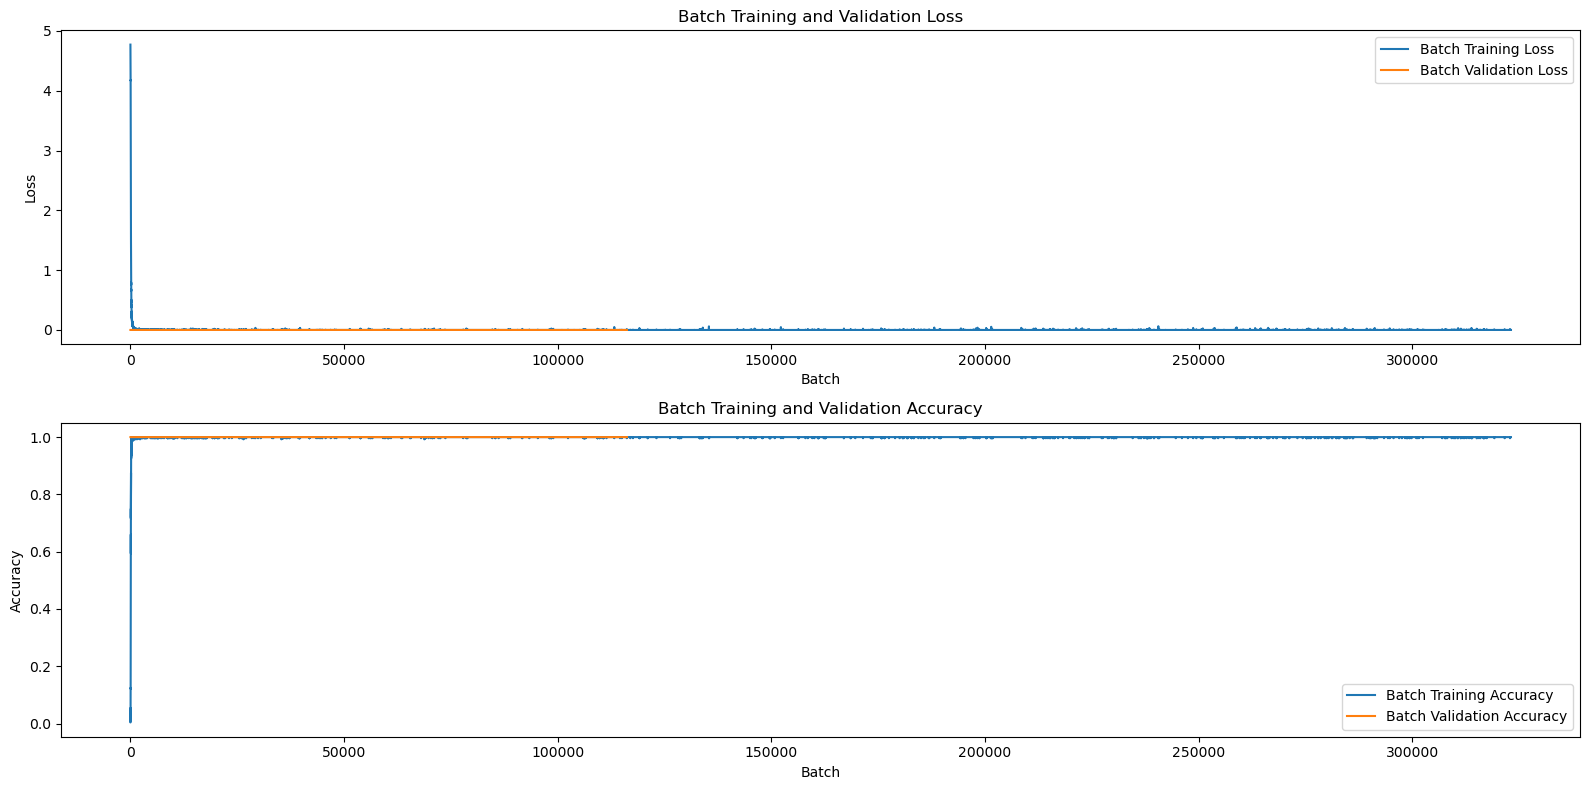

NotImplementedError: Layer TransformerBlock has arguments in `__init__` and therefore must override `get_config`.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention, Embedding, Input, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import joblib
from tqdm import tqdm
import matplotlib.pyplot as plt

# GPU 설정 확인
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    for gpu in tf.config.list_physical_devices('GPU'):
        tf.config.experimental.set_memory_growth(gpu, True)

# 전처리된 데이터 로드
print("Loading preprocessed data...")
train_links_df = pd.read_csv('train_links_df.csv', encoding='utf-8')
validate_links_df = pd.read_csv('validate_links_df.csv', encoding='utf-8')
train_entry_exit_df = pd.read_csv('train_entry_exit_df.csv', encoding='utf-8')
validate_entry_exit_df = pd.read_csv('validate_entry_exit_df.csv', encoding='utf-8')
print("Preprocessed data loaded.")

# LabelEncoder 로드
label_encoder = joblib.load('label_encoder.pkl')

# 데이터셋 준비
print("Preparing datasets...")
x_train = np.array(train_links_df['encoded_source']).reshape(-1, 1)
y_train = to_categorical(train_links_df['encoded_source'], num_classes=len(label_encoder.classes_))
x_val = np.array(validate_links_df['encoded_source']).reshape(-1, 1)
y_val = to_categorical(validate_links_df['encoded_source'], num_classes=len(label_encoder.classes_))
print("Datasets prepared.")

# tf.data.Dataset 사용
print("Creating tf.data.Dataset...")
batch_size = 256

def gen_train():
    for x, y in zip(x_train, y_train):
        yield x, y

def gen_val():
    for x, y in zip(x_val, y_val):
        yield x, y

train_dataset = tf.data.Dataset.from_generator(gen_train, output_signature=(tf.TensorSpec(shape=(1,), dtype=tf.int32), tf.TensorSpec(shape=(len(label_encoder.classes_),), dtype=tf.float32)))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_generator(gen_val, output_signature=(tf.TensorSpec(shape=(1,), dtype=tf.int32), tf.TensorSpec(shape=(len(label_encoder.classes_),), dtype=tf.float32)))
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
print("tf.data.Dataset created.")

# 트랜스포머 모델 정의
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model)[np.newaxis, :] // 2)) / np.float32(d_model))
    angle_rads = np.arange(position)[:, np.newaxis] * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(angle_rads[np.newaxis, ...], dtype=tf.float32)

def TransformerModel(vocab_size, num_layers, d_model, num_heads, dff, input_vocab_size, rate=0.1):
    inputs = Input(shape=(None,))
    embedding = Embedding(input_vocab_size, d_model)(inputs)
    pos_encoding = positional_encoding(500, d_model)
    x = embedding + pos_encoding[:, :tf.shape(inputs)[1], :]
    x = Dropout(rate)(x)
    for _ in range(num_layers):
        x = TransformerBlock(d_model, num_heads, dff, rate)(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(vocab_size, activation='softmax')(x)
    return Model(inputs=inputs, outputs=outputs)

# 모델 빌드 및 컴파일
print("Building and compiling the model...")
vocab_size = len(label_encoder.classes_)
with tf.device('/GPU:0'):
    model = TransformerModel(
        vocab_size=vocab_size,
        num_layers=1,
        d_model=32,
        num_heads=2,
        dff=128,
        input_vocab_size=vocab_size,
        rate=0.1
    )
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
print("Model built and compiled.")

# 학습 루프
print("Starting model training...")
num_epochs = 1

train_steps_per_epoch = np.ceil(len(x_train) / batch_size)
val_steps = np.ceil(len(x_val) / batch_size)

history = {
    'batch_loss': [],
    'batch_accuracy': [],
    'val_batch_loss': [],
    'val_batch_accuracy': []
}

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    
    # Training
    train_loss = []
    train_accuracy = []
    for step, (x_batch_train, y_batch_train) in enumerate(tqdm(train_dataset, desc="Training", total=train_steps_per_epoch, leave=False)):
        hist = model.train_on_batch(x_batch_train, y_batch_train)
        train_loss.append(hist[0])
        train_accuracy.append(hist[1])
        history['batch_loss'].append(hist[0])
        history['batch_accuracy'].append(hist[1])
    
    # Validation
    val_loss = []
    val_accuracy = []
    for x_batch_val, y_batch_val in tqdm(val_dataset, desc="Validation", total=val_steps, leave=False):
        hist = model.test_on_batch(x_batch_val, y_batch_val)
        val_loss.append(hist[0])
        val_accuracy.append(hist[1])
        history['val_batch_loss'].append(hist[0])
        history['val_batch_accuracy'].append(hist[1])
    
    print(f"Training loss: {np.mean(train_loss)}, Training accuracy: {np.mean(train_accuracy)}")
    print(f"Validation loss: {np.mean(val_loss)}, Validation accuracy: {np.mean(val_accuracy)}")

print("Model training finished.")

# 배치 단위 손실 및 정확도 시각화
plt.figure(figsize=(16, 8))

# 배치 단위 손실 그래프
plt.subplot(2, 1, 1)
plt.plot(history['batch_loss'], label='Batch Training Loss')
plt.plot(history['val_batch_loss'], label='Batch Validation Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Batch Training and Validation Loss')
plt.legend()

# 배치 단위 정확도 그래프
plt.subplot(2, 1, 2)
plt.plot(history['batch_accuracy'], label='Batch Training Accuracy')
plt.plot(history['val_batch_accuracy'], label='Batch Validation Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Batch Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 모델 저장
model.save('transformer_model.h5')
print("Model saved.")


In [ ]:
#TF 예측 코드

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt

# 데이터 불러오기
print("Loading validation data...")
validate_links_df = pd.read_csv('validate_links_df.csv', encoding='utf-8-sig')
validate_links_df = validate_links_df[validate_links_df['Date'] == '2024-04-23']  # 4월 23일의 데이터만 사용
print("Validation data loaded.")

label_encoder = joblib.load('label_encoder.pkl')

# 모델 불러오기
print("Loading model...")
model = load_model('transformer_model.h5')
print("Model loaded.")

# 차량 경로 시퀀스 생성
print("Creating vehicle paths...")
def create_vehicle_paths(links_df):
    vehicle_paths = defaultdict(list)
    for _, row in tqdm(links_df.iterrows(), total=links_df.shape[0], desc="Creating Vehicle Paths"):
        vehicle_paths[row['차량ID']].append(row['Source'])
        vehicle_paths[row['차량ID']].append(row['Target'])
    for vehicle_id in vehicle_paths:
        vehicle_paths[vehicle_id] = list(dict.fromkeys(vehicle_paths[vehicle_id]))
    return vehicle_paths

def create_sequence_df(vehicle_paths):
    sequence_data = []
    for vehicle_id, path in vehicle_paths.items():
        for i in range(len(path) - 1):
            sequence_data.append([vehicle_id, path[i], path[i + 1]])
    return pd.DataFrame(sequence_data, columns=['차량ID', 'Source', 'Target'])

# 예측 수행
print("Generating predictions...")
val_vehicle_paths = create_vehicle_paths(validate_links_df)
val_sequence_df = create_sequence_df(val_vehicle_paths)

# 노드 ID에 라벨 인코딩 적용
try:
    val_sequence_df['Source'] = label_encoder.transform(val_sequence_df['Source'])
    val_sequence_df['Target'] = label_encoder.transform(val_sequence_df['Target'])
except Exception as e:
    print(f"Label encoding error: {e}")
    raise

# 시퀀스와 레이블 생성
def create_sequences(sequence_df):
    sequences = []
    for vehicle_id, group in sequence_df.groupby('차량ID'):
        seq = group['Source'].tolist()
        for i in range(1, len(seq)):
            sequences.append(seq[:i])
    return sequences

val_sequences = create_sequences(val_sequence_df)

# 시퀀스 패딩 처리
print("Padding sequences...")
try:
    max_sequence_length = max(len(seq) for seq in val_sequences)
    val_sequences_padded = pad_sequences(val_sequences, maxlen=max_sequence_length, padding='pre')
except Exception as e:
    print(f"Sequence padding error: {e}")
    raise

# 예측 수행
predictions = np.zeros((val_sequences_padded.shape[0], len(label_encoder.classes_)))
print("Predicting...")
for i in tqdm(range(0, val_sequences_padded.shape[0], 256), desc="Prediction Progress"):
    batch_sequences = val_sequences_padded[i:i + 256]
    try:
        with tf.device('/GPU:0'):
            predictions[i:i + len(batch_sequences)] = model.predict(batch_sequences, verbose=0)
    except Exception as e:
        print(f"Prediction error at batch {i}: {e}")
        raise

# 각 시퀀스에 대해 가장 높은 확률을 가진 노드 인덱스 가져오기
print("Processing predictions...")
try:
    predicted_nodes = predictions.argmax(axis=1)
    predicted_node_ids = label_encoder.inverse_transform(predicted_nodes)
except Exception as e:
    print(f"Error during prediction post-processing: {e}")
    raise

# 각 예측된 노드의 발생 빈도 계산
node_counts = pd.Series(predicted_node_ids).value_counts()

# 가장 혼잡한 노드 상위 8개 추출
congested_nodes = node_counts.head(8)
print("Top 8 most congested nodes for 2024-04-23:")
print(congested_nodes)

# 예측된 혼잡 노드 정보를 추출
congested_nodes_df = pd.DataFrame({
    'Date': '2024-04-23',
    'Node': congested_nodes.index,
    'PredictedCount': congested_nodes.values
}).reset_index(drop=True)

# 결과를 CSV 파일로 저장 (한글 인코딩 설정)
congested_nodes_df.to_csv('predicted_congested_nodes(TF)_0423.csv', index=False, encoding='utf-8-sig')
print("예측된 혼잡 노드 정보를 predicted_congested_nodes_0423.csv 파일로 저장했습니다.")

# 실제 혼잡도 데이터 로드
actual_congestion_data = pd.read_csv('actual_congestion_data.csv', encoding='utf-8')

# 날짜가 '2024-04-23'인 데이터만 선택
actual_congestion_data_0423 = actual_congestion_data[actual_congestion_data['Date'] == '2024-04-23']

# 예측된 혼잡도와 실제 혼잡도를 비교하는 그래프 그리기
plt.figure(figsize=(10, 6))

# 예측된 혼잡도 그래프
plt.plot(congested_nodes_df['Node'], congested_nodes_df['PredictedCount'], label='Predicted Congestion', color='blue')

# 실제 혼잡도 그래프
plt.plot(actual_congestion_data_0423['Node'], actual_congestion_data_0423['ActualCount'], label='Actual Congestion', color='red')

plt.xlabel('Node')
plt.ylabel('Congestion')
plt.title('Comparison of Predicted and Actual Congestion for 2024-04-23')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Loading validation data...
